In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
xls = pd.ExcelFile('data/ProblemCData.xlsx')
energy_data = pd.read_excel(xls, 'seseds')
variables = pd.read_excel(xls, 'msncodes')

In [72]:
energy_data.head()

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.0
1,ABICB,AZ,1961,0.0
2,ABICB,AZ,1962,0.0
3,ABICB,AZ,1963,0.0
4,ABICB,AZ,1964,0.0


In [73]:
energy_data['MSN'].nunique()

583

In [74]:
variables['MSN'].nunique()

605

In [75]:
variables.head()

,MSN,Description,Unit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ABICB,Aviation gasoline blending components consumed...,Billion Btu,NaN,NaN,NaN,NaN
1,ABICP,Aviation gasoline blending components consumed...,Thousand barrels,NaN,NaN,NaN,NaN
2,ARICB,Asphalt and road oil consumed by the industria...,Billion Btu,NaN,NaN,NaN,NaN
3,ARICD,Asphalt and road oil price in the industrial s...,Dollars per million Btu,NaN,NaN,NaN,NaN
4,ARICP,Asphalt and road oil consumed by the industria...,Thousand barrels,NaN,NaN,NaN,NaN


In [76]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105744 entries, 0 to 105743
Data columns (total 4 columns):
MSN          105744 non-null object
StateCode    105744 non-null object
Year         105744 non-null int64
Data         105744 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [77]:
variable_columns = energy_data['MSN'].unique()
variable_columns[:5]

array(['ABICB', 'ABICP', 'ARICB', 'ARICD', 'ARICP'], dtype=object)

In [78]:
energy_data['StateCode'].unique()

array(['AZ', 'CA', 'NM', 'TX'], dtype=object)

In [79]:
AZ_data = energy_data[energy_data['StateCode'] == 'AZ']
CA_data = energy_data[energy_data['StateCode'] == 'CA']
NM_data = energy_data[energy_data['StateCode'] == 'NM']
TX_data = energy_data[energy_data['StateCode'] == 'TX']

In [80]:
data = {}
data['AZ'] = AZ_data.pivot(index='Year', columns='MSN', values='Data')
data['TX'] = TX_data.pivot(index='Year', columns='MSN', values='Data')
data['CA'] = CA_data.pivot(index='Year', columns='MSN', values='Data')
data['NM'] = NM_data.pivot(index='Year', columns='MSN', values='Data')
data['AZ']

MSN,ABICB,ABICP,ARICB,ARICD,ARICP,ARICV,ARTCB,ARTCD,ARTCP,ARTCV,...,WWTXB,WWTXD,WWTXV,WXICB,WXICD,WXICP,WXICV,WYEGB,WYEGP,WYTCB
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.00000,0.00000,5726.26021,NaN,862.90841,NaN,5726.26021,NaN,862.90841,NaN,...,3819.24697,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1961,0.00000,0.00000,6274.82747,NaN,945.57376,NaN,6274.82747,NaN,945.57376,NaN,...,3715.21210,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1962,0.00000,0.00000,5741.44510,NaN,865.19667,NaN,5741.44510,NaN,865.19667,NaN,...,3628.19694,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1963,0.00000,0.00000,8193.88866,NaN,1234.76321,NaN,8193.88866,NaN,1234.76321,NaN,...,3937.01824,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1964,0.00000,0.00000,7749.17493,NaN,1167.74788,NaN,7749.17493,NaN,1167.74788,NaN,...,4057.80989,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1965,0.00000,0.00000,7369.23613,NaN,1110.49369,NaN,7369.23613,NaN,1110.49369,NaN,...,3695.21696,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1966,0.00000,0.00000,12551.17339,NaN,1891.37634,NaN,12551.17339,NaN,1891.37634,NaN,...,3679.36818,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1967,0.00000,0.00000,13390.92356,NaN,2017.92097,NaN,13390.92356,NaN,2017.92097,NaN,...,4180.13105,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000
1968,0.00000,0.00000,15229.11009,NaN,2294.92316,NaN,15229.11009,NaN,2294.92316,NaN,...,4147.20373,NaN,NaN,0.00000,NaN,0.00000,NaN,0.0000,0.000,0.0000


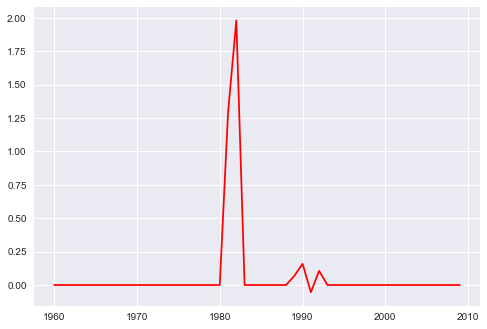

In [81]:
plt.plot(data['AZ']['ABICB'], color='red')
plt.show()

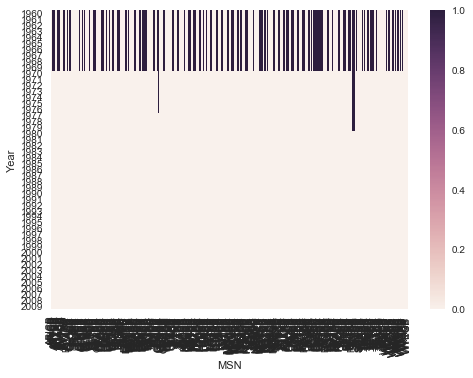

In [82]:
sns.heatmap(data['AZ'].isnull())
plt.show()

In [83]:
variables[variables['MSN'] == 'PAACK']

,MSN,Description,Unit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
401,PAACK,Factor for converting all petroleum products c...,Million Btu per barrel,NaN,NaN,NaN,NaN


In [84]:
energy_data[energy_data['MSN'] == 'PAACK']

,MSN,StateCode,Year,Data


In [85]:
xlsx = pd.ExcelFile('data/table5.xlsx')
state_CO2_data = pd.read_excel(xlsx, 'Sheet1')
state_CO2_data.head(30)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,Percent,Absolute
4,Alabama,31.942364,29.896696,30.900500,30.935183,31.254888,31.351047,31.479457,31.535618,29.581673,25.229535,27.734615,27.054819,25.570075,25.030100,25.416536,24.684050,-0.227232,-7.25831
5,Alaska,70.569459,68.454438,67.846692,67.315932,70.937650,72.033284,67.789971,64.769699,57.389322,54.056077,54.140033,53.284277,51.967702,48.771044,47.618413,48.983270,-0.305886,-21.5862
6,Arizona,16.676168,16.769463,16.263499,16.263250,17.092305,16.558743,16.574140,16.517730,16.283769,14.727290,14.863213,14.428512,13.940210,14.359933,13.851405,13.331587,-0.200561,-3.34458
7,Arkansas,23.775104,23.354926,22.685150,22.780489,22.705536,21.640163,21.991891,22.247648,22.339572,21.252046,22.553272,22.911185,22.403602,23.158833,23.270859,19.858482,-0.164736,-3.91662
8,California,11.251594,11.220586,11.070583,10.604649,11.027864,10.866794,11.035281,11.103388,10.536587,10.063554,9.799912,9.348232,9.394150,9.384729,9.220976,9.323196,-0.171389,-1.9284
9,Colorado,19.560720,20.953325,20.231285,19.914943,20.363327,20.589658,20.417237,20.606135,19.844850,18.688485,18.909863,17.931122,17.468660,17.336850,17.161678,16.563777,-0.153212,-2.99694


In [86]:
# This code works, but I didn't merge it in time
xlsx = pd.ExcelFile('data/table5.xlsx')
state_CO2_data2 = pd.read_excel(xlsx, 'Sheet1', skiprows=5, skipfooter=2)
state_CO2_data2 = state_CO2_data2.transpose()
state_CO2_data2.columns = state_CO2_data2.loc['State']
state_CO2_data2 = state_CO2_data2.drop('State').drop('Percent').drop('Absolute')
state_CO2_data2

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Average all states
2000,31.9424,70.5695,16.6762,23.7751,11.2516,19.5607,12.5897,21.1897,7.50682,14.9391,...,22.4479,31.3967,29.0277,11.0672,17.3199,14.0733,63.5855,20.1045,127.855,20.7294
2001,29.8967,68.4544,16.7695,23.3549,11.2206,20.9533,12.1516,20.2055,7.09268,14.5851,...,22.0353,30.5581,27.582,10.8045,16.7787,13.328,58.2238,19.5954,128.135,20.1417
2002,30.9005,67.8467,16.2635,22.6851,11.0706,20.2313,11.5863,19.7073,7.28151,14.4872,...,21.7163,30.504,26.7758,10.3386,16.3717,12.0923,65.181,19.6833,124.292,20.089
2003,30.9352,67.3159,16.2633,22.7805,10.6046,19.9149,12.2724,20.1858,6.89355,14.4625,...,21.2118,29.7556,26.69,10.6829,16.757,12.3131,63.0025,19.1942,127.261,20.0907
2004,31.2549,70.9376,17.0923,22.7055,11.0279,20.3633,12.7569,19.948,7.04315,14.7731,...,21.3203,29.0072,27.2475,11.3431,17.0278,12.4723,61.3138,19.5112,125.547,20.2587
2005,31.351,72.0333,16.5587,21.6402,10.8668,20.5897,12.5664,20.5806,6.91167,14.6087,...,21.2531,26.8782,27.2894,10.9652,17.0463,12.5517,62.3179,19.9897,123.055,20.1306
2006,31.4795,67.79,16.5741,21.9919,11.0353,20.4172,11.6643,18.91,5.56951,14.264,...,21.2906,26.686,27.0643,10.7282,15.9795,11.9981,62.1879,18.4778,122.6,19.705
2007,31.5356,64.7697,16.5177,22.2476,11.1034,20.6061,11.4109,19.6025,5.88239,13.9826,...,20.8733,26.0167,27.0793,10.4521,16.5014,12.6475,63.184,18.676,124.316,19.8362
2008,29.5817,57.3893,16.2838,22.3396,10.5366,19.8449,10.6213,18.3046,5.31389,12.8756,...,19.6146,24.0655,26.0902,9.52438,14.9005,12.0135,60.6848,18.647,122.594,19.0092
2009,25.2295,54.0561,14.7273,21.252,10.0636,18.6885,10.0866,13.4313,5.36212,12.0231,...,16.2488,22.1799,23.7831,9.88148,13.3331,11.4975,48.4487,16.9792,113.899,17.4859


In [87]:
state_CO2_data.dropna(inplace=True)

In [88]:
cols = state_CO2_data.columns

In [89]:
state_CO2_data_trimmed = state_CO2_data[cols[:17]]

In [90]:
state_CO2_data_trimmed

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
3,State,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000
4,Alabama,31.942364,29.896696,30.900500,30.935183,31.254888,31.351047,31.479457,31.535618,29.581673,25.229535,27.734615,27.054819,25.570075,25.030100,25.416536,24.684050
5,Alaska,70.569459,68.454438,67.846692,67.315932,70.937650,72.033284,67.789971,64.769699,57.389322,54.056077,54.140033,53.284277,51.967702,48.771044,47.618413,48.983270
6,Arizona,16.676168,16.769463,16.263499,16.263250,17.092305,16.558743,16.574140,16.517730,16.283769,14.727290,14.863213,14.428512,13.940210,14.359933,13.851405,13.331587
7,Arkansas,23.775104,23.354926,22.685150,22.780489,22.705536,21.640163,21.991891,22.247648,22.339572,21.252046,22.553272,22.911185,22.403602,23.158833,23.270859,19.858482
8,California,11.251594,11.220586,11.070583,10.604649,11.027864,10.866794,11.035281,11.103388,10.536587,10.063554,9.799912,9.348232,9.394150,9.384729,9.220976,9.323196
9,Colorado,19.560720,20.953325,20.231285,19.914943,20.363327,20.589658,20.417237,20.606135,19.844850,18.688485,18.909863,17.931122,17.468660,17.336850,17.161678,16.563777
10,Connecticut,12.589651,12.151627,11.586330,12.272410,12.756939,12.566426,11.664252,11.410937,10.621336,10.086624,10.120974,9.706498,9.494571,9.699965,9.770199,10.168445
11,Delaware,21.189741,20.205461,19.707283,20.185798,19.947952,20.580577,18.910039,19.602491,18.304608,13.431296,13.083278,14.225458,15.194361,14.738997,14.223709,14.212774
12,District of Columbia,7.506815,7.092676,7.281513,6.893546,7.043151,6.911668,5.569506,5.882387,5.313889,5.362115,5.320312,4.979802,4.180577,4.366238,4.592017,4.471535


In [91]:
TX_CO2_data = pd.DataFrame()

In [92]:
useful_cols = cols[1:17]

In [93]:
state_CO2_data_trimmed[state_CO2_data_trimmed['Unnamed: 0'] == 'State'][useful_cols]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
3,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0


In [94]:
years = state_CO2_data_trimmed[state_CO2_data_trimmed['Unnamed: 0'] == 'State'][useful_cols].values
TX_emissions = state_CO2_data_trimmed[state_CO2_data_trimmed['Unnamed: 0'] == 'Texas'][useful_cols].values

In [95]:
years

array([[ 2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
         2008.,  2009.,  2010.,  2011.,  2012.,  2013.,  2014.,  2015.]])

In [96]:
TX_emissions = TX_emissions[0]

In [97]:
years = years[0]

In [98]:
TX_CO2_data['Year'] = years
TX_CO2_data['Emissions per Capita'] = TX_emissions

In [99]:
TX_CO2_data

,Year,Emissions per Capita
0,2000.0,31.396657
1,2001.0,30.558142
2,2002.0,30.503995
3,2003.0,29.755643
4,2004.0,29.007241
5,2005.0,26.878233
6,2006.0,26.685993
7,2007.0,26.016721
8,2008.0,24.065531
9,2009.0,22.179922


In [100]:
CA_emissions = state_CO2_data_trimmed[state_CO2_data_trimmed['Unnamed: 0'] == 'California'][useful_cols].values
CA_emissions = CA_emissions[0]

NM_emissions = state_CO2_data_trimmed[state_CO2_data_trimmed['Unnamed: 0'] == 'New Mexico'][useful_cols].values
NM_emissions = NM_emissions[0]

AZ_emissions = state_CO2_data_trimmed[state_CO2_data_trimmed['Unnamed: 0'] == 'Arizona'][useful_cols].values
AZ_emissions = AZ_emissions[0]

CA_CO2_data = pd.DataFrame({'Year': years, 'Emissions per Capita': CA_emissions})
NM_CO2_data = pd.DataFrame({'Year': years, 'Emissions per Capita': NM_emissions})
AZ_CO2_data = pd.DataFrame({'Year': years, 'Emissions per Capita': AZ_emissions})

In [101]:
AZ_CO2_data

,Emissions per Capita,Year
0,16.676168,2000.0
1,16.769463,2001.0
2,16.263499,2002.0
3,16.263250,2003.0
4,17.092305,2004.0
5,16.558743,2005.0
6,16.574140,2006.0
7,16.517730,2007.0
8,16.283769,2008.0
9,14.727290,2009.0


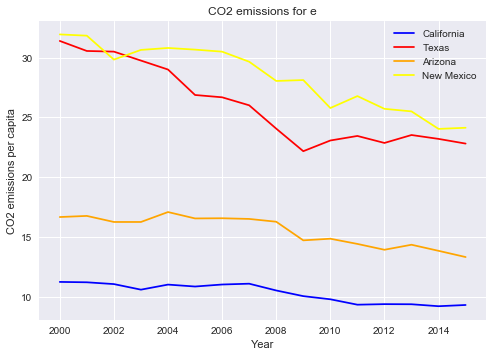

In [102]:
plt.plot(years, CA_CO2_data['Emissions per Capita'], color='blue', label='California')
plt.plot(years, TX_CO2_data['Emissions per Capita'], color='red', label='Texas')
plt.plot(years, AZ_CO2_data['Emissions per Capita'], color='orange', label='Arizona')
plt.plot(years, NM_CO2_data['Emissions per Capita'], color='yellow', label='New Mexico')
plt.xlabel('Year')
plt.ylabel('CO2 emissions per capita')
plt.title('CO2 emissions for e')
plt.legend()
plt.show()

In [103]:
data['AZ']['ELISB']

Year
1960    -14965.75194
1961    -16277.01415
1962    -15044.71745
1963     -8686.13176
1964      4277.69580
1965      6384.18716
1966      4462.91435
1967     13962.97118
1968      6104.23497
1969     10428.52018
1970     25352.87314
1971     24285.12720
1972     31742.43064
1973     28985.77882
1974     15258.50202
1975     15608.75030
1976    -19977.74331
1977    -44182.93097
1978    -35480.12023
1979    -69405.44621
1980    -85621.93544
1981   -100721.67510
1982   -105473.92000
1983   -123025.37990
1984   -149834.47140
1985   -137017.57790
1986   -163284.85500
1987   -143952.96790
1988   -220881.23240
1989    -98723.64934
1990   -185367.44930
1991   -224362.64950
1992   -240601.05280
1993   -204296.77710
1994   -211860.39790
1995   -183150.88700
1996   -171949.61950
1997   -210871.56170
1998   -226710.42670
1999   -219643.99200
2000   -238569.51120
2001   -241263.91300
2002   -252406.27140
2003   -235691.92080
2004   -287810.12720
2005   -218060.36570
2006   -200419.11350
2007   -

In [104]:
import functools

descriptions = variables['Description'].str.lower().str.replace('.', '').str.strip()
def search_vars(*args):
    masks = [descriptions.str.contains(arg.lower()) for arg in args]
    mask = functools.reduce(lambda x, y: x & y, masks)
    return list(set(descriptions[mask]))
search_vars('waste')

['waste consumed by the commercial sector',
 'wood and waste total consumption',
 'wood and waste price in the electric power sector',
 'waste consumed by the industrial sector',
 'wood and waste consumed in the commercial sector at no cost',
 'wood and waste total expenditures',
 'wood and waste price in the commercial sector',
 'wood and waste consumed in the industrial sector at no cost',
 'waste consumed by the electric power sector',
 'wood and waste consumed by the industrial sector',
 'wood and waste consumed by the electric power sector',
 'wood and waste average price, all sectors',
 'wood and waste expenditures in the electric power sector',
 'wood and waste total end-use expenditures',
 'wood and waste expenditures in the commercial sector',
 'wood and waste consumed by the commercial sector',
 'wood and waste total end-use consumption',
 'wood and waste expenditures in the industrial sector',
 'wood and waste consumed in the commercial sector at a cost',
 'wood and waste co

In [105]:
import re
all_sources = set()
all_sectors = set()
for description in descriptions:
    m = re.match('(.*) consumed by the (.*)', description)
    if m and 'factor' not in description:
        all_sources.add(m.group(1))
        all_sectors.add(m.group(2))

In [106]:
print(variables['MSN'].str[2:4].unique())
all_sectors = {
    'AC': 'transportation',
    'CC': 'commercial',
    'EI': 'electric',
    'EG': 'electric',
    'IC': 'industrial',
    'RC': 'residential',
    'HC': 'residential and commercial',
}
all_sources_shrt = set(variables['MSN'].str[0:2].unique())

['IC' 'TC' 'TX' 'AC' 'EX' 'IM' 'NI' 'CC' 'EI' 'HC' 'KC' 'OC' 'OS' 'PR' 'RC'
 'RF' 'XC' 'IS' 'FD' 'LC' 'ET' 'EG' 'LP' 'MP' 'PZ' 'VH' 'IN' 'GD' 'PF' 'TG'
 'TP' 'SC' 'OP' 'RS' 'RX' 'CS' 'CX' 'IX']


- [Analysis of Texas](https://www.eia.gov/state/analysis.php?sid=TX)

- [CSV meta documentation](https://www.eia.gov/state/seds/sep_use/total/csv/use_csv_doc.pdf)

- [Petroleum documentation](https://www.eia.gov/state/seds/sep_fuel/notes/use_petrol.pdf)

- [Renewable documentation](https://www.eia.gov/state/seds/sep_fuel/notes/use_renew.pdf)

In [107]:
petroleum_energy = {
    "AB": "aviation gasoline blending components", # only has statistics for sector="transportation", naturally
    "AV": "aviation gasoline",
    "CL": "coal", # note that we are coal consumed at coke plants. That gets counted in source="petroleum coke"
    "DF": "distillate fuel oil", # sector="industrial" includes refinery fuel and non-refinery fuel
    "JF": "jet fuel", # only sector="transportation", naturally. Includes kerosene-type and naptha-type jet fuel
    "KS": "kerosene",
    "LG": "liquified petroleum gas",
    "MB": "motor gasoline blending",
    "MG": "motor gasoline",
    "FS": "petrochemical feedstocks, still gas", # burned as refinery fuel. Only sector="industrial", naturally
    "JN": "naphtha-type jet fuel",
    "JK": "kerosene-type jet fuel",
    "NA": "natural gasoline",
    "NG": "natural gas",
    "PC": "petroleum coke",
    "RF": "residual fuel oil",
    "SG": "still gas", # make sure this does not include FS
}
petroleum_other = {
    "AR": "asphalt and road oil",
    "CC": "coal coke", # only has imports and exports
    "CO": "crude oil", # only consumed by sector="industrial", naturally
    'DK': 'distillate fuel oil and kerosene-type jet fuel',
    'FF': 'fossil fuels', # sum of other things we are measuring
    "LU": "lubricants",
    "FN": "petrochemical feedstocks, naphtha less than 401 degrees f,",
    "FO": "petrochemical feedstocks, other oils equal to or greater than 401 degrees f,",
    'MM': 'motor gasoline total consumption excluding fuel ethanol.',
    "MS": "miscellaneous petroleum products",
    "NN": 'Natural gas (excluding supplemental gaseous fuels)',
    "P1": 'Asphalt and road oil, aviation gasoline, kerosene, lubricants, and "other petroleum products"',
    "P5": 'Other petroleum products (SG and PC consumed as process fuel and AB, MB, PP, and UO consumed as intermediate products).',
    'PA': "all petroleum products",
    'PM': "all petroleum products total consumption excluding fuel ethanol",
    "PO": "other petroleum products",
    "PP": "pentanes plus",
    "SF": "supplemental gaseous fuels",
    "SN": "special napthas",
    'UO': 'unfinished oils',
    'WX': "waxes",
}

renewable_energy = {
    "EM": "fuel ethanol (excluding denaturant)",
    # Fuel ethanol contains a small amount of denaturant, which is added to make thefinished product unsuitable for human consumption. Fuel ethanol denaturantis typically natural gasoline (pentanes plus) or conventional gasoline. Thesevolumes  are  already  accounted  for  under  petroleum.  Therefore,  to  avoiddouble-counting,  and  to  separately  identify  the  renewable  content  of  fuelethanol,  EIA  estimates  the  Btu  content  of  fuel  ethanol  excluding  denaturantconsumed by the United States. 
    "GE": "geothermal energy",
    # note that geothermal variables are 'different'
    # DGECCB	Direct use of geothermal energy and heat pumps in the commercial sector.	Billion Btu
    "NU": "nuclear",
    "PL": "plant condensate", # not in documentation. what is this exactly?
    'HY': "hydroelectricity",
    "SO": "photovoltaic and solar thermal energy",
    # consumption data is reported for residential and commercial sectors together
    'WD': "wood",
    'WS': 'waste', # consider "wood and waste" instead
    'WY': "wind",
}

renewable_other = {
    'EN': 'fuel ethanol (including denaturant)', # see EM
    'RE': 'renewables',
    'WW': 'wood and waste',
    'BM': 'biomass', # sum of other things we are measuring
    'GO': 'weird combination',
    # GOCCB	Geothermal energy and hydroelectricity consumed in the commercial sector.
    # GORCB	Geothermal and solar energy consumed in the residential sector.
    'RO': 'renewable energy production, other than fuel ethanol',
}

electric_energy = {
    'ES': 'electricity'
}

other_other = {
    'PE': 'primary energy',
    'TE': 'total energy',
    'TN': 'primary energy and electricity',
    'US': 'unfractionated stream',
    'GD': 'GDP',
    'EL': 'electricity (im|ex)ports',
    'LO': 'energy losses',
    'TP': 'resident population',
}

In [108]:
relevant_sources = functools.reduce(lambda x, y: x | y, [
    set(dct.keys())
    for dct in [petroleum_energy, renewable_energy, electric_energy]
])
print(len(relevant_sources), len(relevant_sources) * 5)

27 135


In [109]:
import collections

only_eg = {'AC', 'CC', "EI", "IC", "RC"} # only used for electrical power generation

zeros = collections.defaultdict(set, {
    'EM': {'EI', 'EG', 'RC'}, # not used for electrical power generation nor residential sector
    'DF': {'EI', 'EG'}, # not used for electrical power generation
    'WY': only_eg,
    'NU': only_eg,
    'SO': only_eg,
    'NG': {'EG'},
    'KS': {'AC', 'EI'}
})

relevant_vars = []
for source in relevant_sources:
    for sector in all_sectors:
        this_var = source + sector + 'B'
        these_vars = list(variables[variables['MSN'].str.startswith(this_var)]['MSN'])
        if these_vars:
            relevant_vars.append(this_var)

In [110]:
relevant_vars

['KSICB',
 'KSCCB',
 'KSRCB',
 'JNACB',
 'SOHCB',
 'SOEGB',
 'FSICB',
 'EMICB',
 'EMACB',
 'EMCCB',
 'LGICB',
 'LGACB',
 'LGCCB',
 'LGRCB',
 'AVACB',
 'CLICB',
 'CLACB',
 'CLCCB',
 'CLRCB',
 'CLEIB',
 'NAICB',
 'JFACB',
 'JKACB',
 'GEICB',
 'GECCB',
 'GERCB',
 'GEEGB',
 'DFICB',
 'DFACB',
 'DFCCB',
 'DFRCB',
 'RFICB',
 'RFACB',
 'RFCCB',
 'RFEIB',
 'WSICB',
 'WSCCB',
 'WSEIB',
 'MBICB',
 'PLICB',
 'NGICB',
 'NGACB',
 'NGCCB',
 'NGRCB',
 'NGEIB',
 'NUEGB',
 'WDICB',
 'WDCCB',
 'WDRCB',
 'WDEIB',
 'PCICB',
 'PCCCB',
 'PCEIB',
 'ESICB',
 'ESACB',
 'ESCCB',
 'ESRCB',
 'ABICB',
 'HYICB',
 'HYCCB',
 'HYEGB',
 'WYEGB',
 'SGICB',
 'MGICB',
 'MGACB',
 'MGCCB']

In [111]:
energy_profile_vars = list(petroleum_energy.keys()) + list(electric_energy.keys()) + list(renewable_energy.keys())

In [112]:
energy_profile_vars

['KS',
 'JN',
 'FS',
 'NG',
 'MB',
 'LG',
 'AV',
 'CL',
 'NA',
 'AB',
 'JF',
 'JK',
 'SG',
 'PC',
 'DF',
 'RF',
 'MG',
 'ES',
 'PL',
 'SO',
 'EM',
 'WY',
 'WD',
 'GE',
 'HY',
 'NU',
 'WS']

In [113]:
def trunc(x):
    return x[:2]

In [114]:
energy_profile_full_vars = []
for column in data['AZ'].columns:
    if(trunc(column) in energy_profile_vars):
        energy_profile_full_vars.append(column)

In [115]:
len(energy_profile_full_vars)

357

In [116]:
data['AZ'][energy_profile_full_vars]

MSN,ABICB,ABICP,AVACB,AVACD,AVACP,AVACV,AVTCB,AVTCD,AVTCP,AVTCV,...,WDRCP,WDRCV,WDRSB,WDRXB,WSCCB,WSEIB,WSICB,WYEGB,WYEGP,WYTCB
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.00000,0.00000,3531.04046,NaN,699.49296,NaN,3531.04046,NaN,699.49296,NaN,...,138.46000,NaN,NaN,NaN,0.00,193.70152,0.00000,0.0000,0.000,0.0000
1961,0.00000,0.00000,2323.87083,NaN,460.35476,NaN,2323.87083,NaN,460.35476,NaN,...,135.88000,NaN,NaN,NaN,0.00,121.75080,0.00000,0.0000,0.000,0.0000
1962,0.00000,0.00000,3776.94172,NaN,748.20557,NaN,3776.94172,NaN,748.20557,NaN,...,133.30000,NaN,NaN,NaN,0.00,43.93184,0.00000,0.0000,0.000,0.0000
1963,0.00000,0.00000,3399.17777,NaN,673.37119,NaN,3399.17777,NaN,673.37119,NaN,...,131.58000,NaN,NaN,NaN,0.00,90.51207,0.00000,0.0000,0.000,0.0000
1964,0.00000,0.00000,3005.91570,NaN,595.46666,NaN,3005.91570,NaN,595.46666,NaN,...,132.44000,NaN,NaN,NaN,0.00,31.29184,0.00000,0.0000,0.000,0.0000
1965,0.00000,0.00000,2411.14403,NaN,477.64343,NaN,2411.14403,NaN,477.64343,NaN,...,129.00000,NaN,NaN,NaN,0.00,0.00000,0.00000,0.0000,0.000,0.0000
1966,0.00000,0.00000,2634.70602,NaN,521.93067,NaN,2634.70602,NaN,521.93067,NaN,...,132.44000,NaN,NaN,NaN,0.00,0.00000,0.00000,0.0000,0.000,0.0000
1967,0.00000,0.00000,2721.23071,NaN,539.07106,NaN,2721.23071,NaN,539.07106,NaN,...,135.88000,NaN,NaN,NaN,0.00,0.00000,0.00000,0.0000,0.000,0.0000
1968,0.00000,0.00000,2402.64421,NaN,475.95963,NaN,2402.64421,NaN,475.95963,NaN,...,140.18000,NaN,NaN,NaN,0.00,0.00000,0.00000,0.0000,0.000,0.0000


## Using a Random Forest to Asses Feature Importance

In [117]:
rf_training_data_AZ = data['AZ'][(data['AZ'].index <= 2009) & (data['AZ'].index >= 2000)]
rf_training_data_NM = data['NM'][(data['NM'].index <= 2009) & (data['NM'].index >= 2000)]
rf_training_data_CA = data['CA'][(data['CA'].index <= 2009) & (data['CA'].index >= 2000)]
rf_training_data_TX = data['TX'][(data['TX'].index <= 2009) & (data['TX'].index >= 2000)]

In [118]:
rf_training_data_AZ = rf_training_data_AZ[energy_profile_full_vars]
rf_training_data_NM = rf_training_data_NM[energy_profile_full_vars]
rf_training_data_CA = rf_training_data_CA[energy_profile_full_vars]
rf_training_data_TX = rf_training_data_TX[energy_profile_full_vars]

In [119]:
AZ_CO2_data['Emissions per Capita'].loc[:10]

0     16.676168
1     16.769463
2     16.263499
3     16.263250
4     17.092305
5     16.558743
6     16.574140
7     16.517730
8     16.283769
9     14.727290
10    14.863213
Name: Emissions per Capita, dtype: float64

In [120]:
# Represents combined data for all states to be used for random forest
rf_training_data = pd.concat([rf_training_data_AZ, rf_training_data_CA, rf_training_data_NM, rf_training_data_TX])
CO2_data = pd.concat([AZ_CO2_data.iloc[:10], CA_CO2_data.iloc[:10], NM_CO2_data.iloc[:10], TX_CO2_data.iloc[:10]])

In [121]:
CO2_data

,Emissions per Capita,Year
0,16.676168,2000.0
1,16.769463,2001.0
2,16.263499,2002.0
3,16.263250,2003.0
4,17.092305,2004.0
5,16.558743,2005.0
6,16.574140,2006.0
7,16.517730,2007.0
8,16.283769,2008.0
9,14.727290,2009.0


In [122]:
rf_training_data

MSN,ABICB,ABICP,AVACB,AVACD,AVACP,AVACV,AVTCB,AVTCD,AVTCP,AVTCV,...,WDRCP,WDRCV,WDRSB,WDRXB,WSCCB,WSEIB,WSICB,WYEGB,WYEGP,WYTCB
Year,,,,,,,,,,,,,,,,,,,,,
2000,0.00000,0.00000,1028.41314,10.86609,203.72685,11.17483,1028.41314,10.86609,203.72685,11.17483,...,487.30908,24.12180,4103.14245,5643.03915,64.00,0.00,222.84901,0.00000,0.00000,0.00000
2001,0.00000,0.00000,966.39487,11.00753,191.44114,10.63762,966.39487,11.00753,191.44114,10.63762,...,284.04194,13.42974,2391.63313,3289.20567,69.00,341.00,162.01206,0.00000,0.00000,0.00000
2002,0.00000,0.00000,925.29401,10.71632,183.29913,9.91575,925.29401,10.71632,183.29913,9.91575,...,288.32054,12.36477,2427.65895,3338.75185,46.00,381.27,236.19826,0.00000,0.00000,0.00000
2003,0.00000,0.00000,1177.42409,12.42195,233.24566,14.62590,1177.42409,12.42195,233.24566,14.62590,...,303.49530,15.62112,2555.43043,3514.47557,47.00,327.00,227.58302,0.00000,0.00000,0.00000
2004,0.00000,0.00000,826.83933,15.13431,163.79543,12.51364,826.83933,15.13431,163.79543,12.51364,...,311.08268,18.19147,2619.31617,3602.33743,0.05,361.08,225.28050,0.00000,0.00000,0.00000
2005,0.00000,0.00000,946.61716,18.56220,187.52321,17.57130,946.61716,18.56220,187.52321,17.57130,...,417.03671,32.29487,3511.44910,4829.28510,55.41,354.91,238.43705,0.00000,0.00000,0.00000
2006,0.00000,0.00000,892.73375,22.31458,176.84900,19.92098,892.73375,22.31458,176.84900,19.92098,...,379.60458,33.86986,3196.27056,4395.82104,64.82,326.57,570.72911,0.00000,0.00000,0.00000
2007,0.00000,0.00000,731.98055,23.70404,145.00407,17.35090,731.98055,23.70404,145.00407,17.35090,...,418.53839,40.96117,3524.09324,4846.67456,66.54,214.10,645.95323,0.00000,0.00000,0.00000
2008,0.00000,0.00000,789.37585,27.23177,156.37398,21.49610,789.37585,27.23177,156.37398,21.49610,...,438.00529,53.21271,3688.00454,5072.10126,58.23,237.17,642.02001,0.00000,0.00000,0.00000


In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
random_forest = RandomForestRegressor(n_estimators=1000, n_jobs=4)
random_forest.fit(rf_training_data, CO2_data['Emissions per Capita'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [125]:
random_forest.feature_importances_

array([  5.40808608e-04,   2.36306494e-04,   1.53419325e-04,
         5.09186974e-05,   3.46198431e-04,   4.42278836e-04,
         1.61842633e-04,   8.44911359e-06,   1.84734197e-04,
         4.99367561e-04,   1.64644917e-04,   2.60208448e-05,
         1.32990617e-04,   2.17739594e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   6.67868920e-05,   3.00954782e-04,
         7.39131710e-05,   7.70170709e-05,   1.36547157e-03,
         4.27429309e-05,   1.14875459e-01,   1.26517851e-03,
         1.87229957e-03,   7.64494922e-05,   9.45068359e-05,
         8.40042071e-05,   5.32542512e-04,   2.82428849e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.41870187e-04,
         1.36557756e-04,   3.66152065e-04,   1.96727098e-04,
         2.12164449e-04,   4.00225295e-04,   5.21369979e-02,
         1.91002671e-03,   5.20810253e-02,   1.25255599e-04,
         1.59776243e-04,

In [126]:
feature_importance_dict = dict(zip(energy_profile_full_vars, random_forest.feature_importances_))

In [127]:
max(feature_importance_dict, key=feature_importance_dict.get)

'CLEIK'

In [128]:
top_50_feats = sorted(feature_importance_dict.items(), key=lambda x: x[1])[-50:]

In [131]:
top_50_feats

[('GECCB', 0.00065222468163516083),
 ('WYEGP', 0.00066046778983160082),
 ('EMACV', 0.00067028165923332212),
 ('GETCB', 0.00068360290209781491),
 ('DFTXP', 0.00068813526266880466),
 ('LGACD', 0.00072758039493116397),
 ('RFTCB', 0.00073353701717398113),
 ('ESRFB', 0.00073635439993173252),
 ('WYEGB', 0.00074307761872822575),
 ('RFACV', 0.00074435932033480251),
 ('RFTXP', 0.00079947458039737697),
 ('CLXCV', 0.00081332099260809964),
 ('RFACB', 0.00085012346017475848),
 ('NGPZB', 0.0011319747128662452),
 ('WDEIB', 0.0011396030085646066),
 ('WDRCV', 0.0011755640926518363),
 ('CLTCV', 0.0011942631645976522),
 ('CLEIP', 0.001265178505123217),
 ('CLEIB', 0.0013654715719009856),
 ('GETXB', 0.0013867693819732995),
 ('NGPZP', 0.0013987311609886617),
 ('CLTCP', 0.0014703341873924395),
 ('CLTCB', 0.0014738390092701062),
 ('ESICD', 0.0015259597139442688),
 ('CLEIV', 0.0018722995695992714),
 ('CLPRK', 0.0019100267083520617),
 ('NUETD', 0.0019553869977342593),
 ('ESRCD', 0.0020132855747244482),
 ('ESTCD

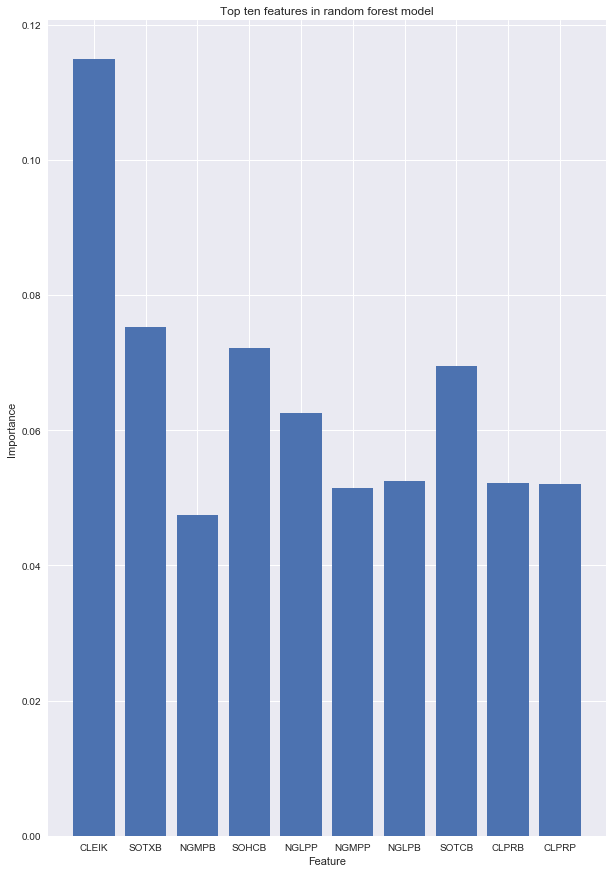

In [130]:
plt.figure(figsize=(10,15))
plt.bar(range(len(dict(top_50_feats[-10:]))), dict(top_50_feats[-10:]).values(), align='center')
plt.xticks(range(len(dict(top_50_feats[-10:]))), list(dict(top_50_feats[-10:]).keys()))
plt.title('Top ten features in random forest model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## Assessing Feature Importance for Just "Relevant" Features

In [133]:
# Are the "relevant features" a subset of the "relevant by source" features?
set(relevant_vars) < set(energy_profile_full_vars)

True

In [136]:
random_forest_less_vars = RandomForestRegressor(n_estimators=1000, n_jobs=4)
random_forest_less_vars.fit(rf_training_data[relevant_vars], CO2_data['Emissions per Capita'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [137]:
random_forest_less_vars.feature_importances_

array([  1.25597340e-03,   1.45953638e-03,   1.39446450e-03,
         0.00000000e+00,   4.74182152e-01,   1.05781125e-01,
         0.00000000e+00,   2.16406240e-03,   1.30934757e-03,
         6.60786275e-04,   8.25286211e-04,   8.21231508e-04,
         1.28206708e-03,   1.56641756e-03,   1.38513156e-03,
         1.62845037e-03,   0.00000000e+00,   5.32633899e-04,
         5.45444011e-04,   7.78689516e-03,   0.00000000e+00,
         2.03111758e-03,   1.01512937e-03,   1.18703093e-03,
         3.47767522e-03,   3.65269150e-03,   1.17084925e-03,
         1.38717897e-03,   3.89319949e-03,   1.04653826e-03,
         2.14743175e-03,   2.62363399e-03,   4.84582104e-03,
         1.32530921e-04,   1.98043857e-04,   1.19808644e-03,
         1.46050459e-03,   2.16573877e-03,   0.00000000e+00,
         0.00000000e+00,   1.17773733e-03,   1.58236226e-03,
         9.06402023e-04,   1.29428961e-03,   1.33243290e-03,
         2.19643336e-03,   1.36239386e-03,   3.47415144e-03,
         3.19774243e-03,